# **1.** Mount Google Drive 





# Lab8 - Codificação de Áudio com ffmpeg

Objetivos:
<ul>
<li> Conhecer as opções de codificação do ffmpeg </li>
<li> Verificar várias taxas mpeg 1, camada 3 e conversão entre codecs </li>
<li> Variação de tempo </li>
</ul>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Arquivo .wav full

In [78]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import math

In [79]:
usher_needu320k = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu.wav'
fer320 , sr320 = librosa.load(usher_needu320k)
print(type(fer320), type(sr320))
print(fer320.shape, sr320)
# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=fer320, rate=sr320)

Output hidden; open in https://colab.research.google.com to view.

Espectrograma Original

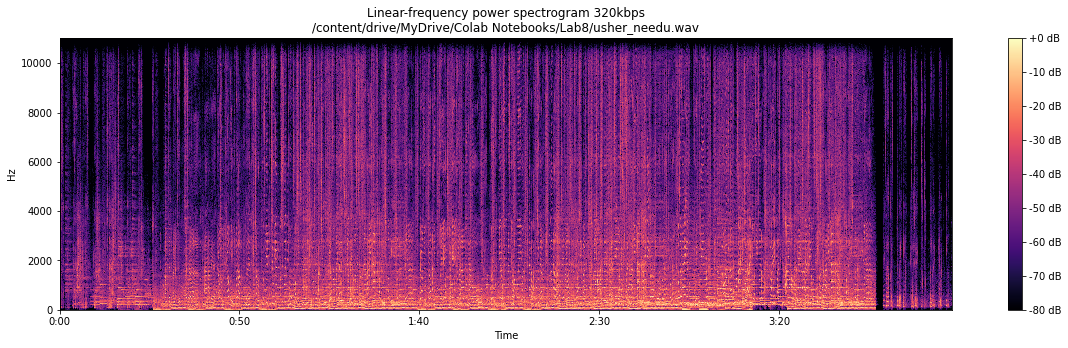

In [80]:
plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer320)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 320kbps\n'+ usher_needu320k)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot320.png")

Verificar os codecs

# Opções do ffmpeg

Conversão wav em mp3, 128kbps

In [81]:
!ffmpeg -h

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [82]:
!ffmpeg -codecs

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [83]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu.wav' -codec:a libmp3lame -b:a 128k '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k.mp3'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Áudio e Espectrograma do arquivo codificado

In [84]:
usher_needu128k = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k.mp3'
print(usher_needu128k)
fer128 , sr128 = librosa.load(usher_needu128k)
print(type(fer128), type(sr128))
print(fer128.shape, sr128)
# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=fer128, rate=sr128)

Output hidden; open in https://colab.research.google.com to view.

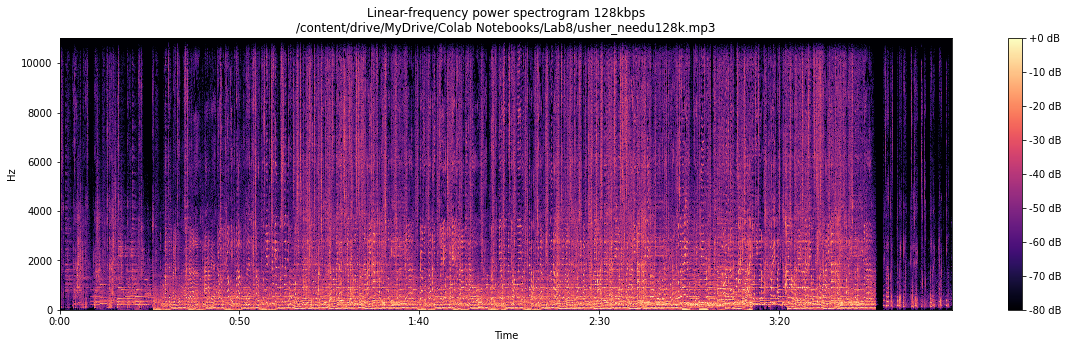

In [85]:
plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer128)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 128kbps\n'+ usher_needu128k)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot128.png")

Espectrograma do Arquivo codificado a 128kbps

Codificando a 64kbps

In [86]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu.wav' -codec:a libmp3lame -b:a 64k '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu64k.mp3'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Espectrograma do arquivo a 64kbps

/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu64k.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


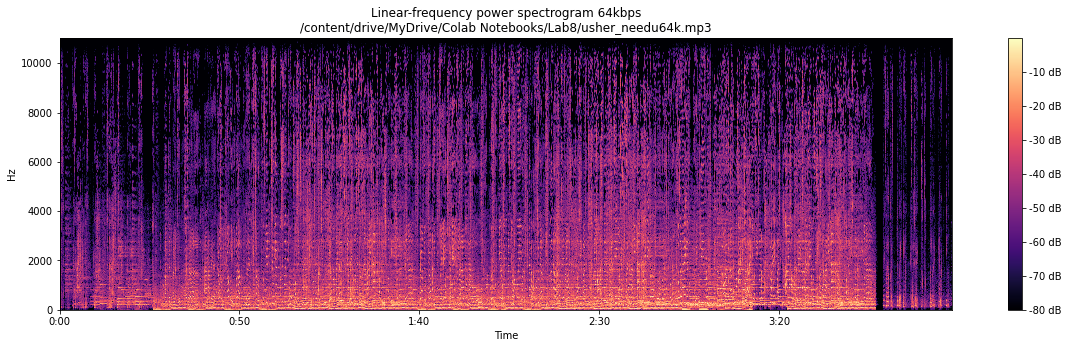

In [87]:
usher_needu64k = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu64k.mp3'
print(usher_needu64k)
fer64 , sr64 = librosa.load(usher_needu64k)
plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer64)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 64kbps\n'+ usher_needu64k)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot64.png")

Audio do arquivo

In [88]:
IPython.display.Audio(data=fer64, rate=sr64)

Output hidden; open in https://colab.research.google.com to view.

Conversão de Codecs

In [89]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k.mp3' -c:a libvorbis '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k.ogg'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [90]:
!ls -l


total 8
drwx------ 5 root root 4096 Dec  9 01:15 drive
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data


Faça o procedimento para mais três taxas, 32k, 16k e 8kbps.


Codificando a 32kbps

In [91]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu.wav' -codec:a libmp3lame -b:a 32k '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu32k.mp3'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Espectrograma e audio do arquivo a 32kbps

In [92]:
usher_needu32k = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu32k.mp3'
print(usher_needu32k)
fer32 , sr32 = librosa.load(usher_needu32k)
plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer32)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 32kbps\n'+ usher_needu32k)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot32.png")

# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=fer32, rate=sr32)

Output hidden; open in https://colab.research.google.com to view.

Codificando a 16kbps

In [93]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu.wav' -codec:a libmp3lame -b:a 16k '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu16k.mp3'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Espectrograma e audio do arquivo a 16kbps

In [94]:
usher_needu16k = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu16k.mp3'
print(usher_needu16k)
fer16 , sr16 = librosa.load(usher_needu16k)
plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer16)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 16kbps\n'+ usher_needu16k)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot16.png")

# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=fer16, rate=sr16)

Output hidden; open in https://colab.research.google.com to view.

Codificando a 8kbps

In [95]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu.wav' -codec:a libmp3lame -b:a 8k '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu8k.mp3'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Espectrograma e audio do arquivo a 16kbps

In [96]:
usher_needu8k = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu8k.mp3'
print(usher_needu8k)
fer8 , sr8 = librosa.load(usher_needu8k)
plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer8)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 8kbps\n'+ usher_needu8k)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot8.png")

# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=fer8, rate=sr8)

Output hidden; open in https://colab.research.google.com to view.

Alterando a velocidade

In [97]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k.mp3' -filter:a "atempo=2.0" -vn '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k_v2.mp3'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Audio v2

In [98]:
usher_needu128k_2 = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k_v2.mp3'
print(usher_needu128k_2)
fer128_2 , sr128_2 = librosa.load(usher_needu128k_2)
plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer128_2)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 128kbps Velocidade 2x mais rápido\n'+ usher_needu128k_2)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot128_v2.png")
IPython.display.Audio(data=fer128_2, rate=sr128_2)

Output hidden; open in https://colab.research.google.com to view.

Mude para um tempo mais lento

In [99]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k.mp3' -filter:a "atempo=0.5" -vn '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k_v3.mp3'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Audio v3

In [100]:
usher_needu128k_3 = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu128k_v3.mp3'
print(usher_needu128k_3)
fer128_3 , sr128_3 = librosa.load(usher_needu128k_3)


plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer128_3)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram 128kbps Velocidade 2x mais lento\n'+ usher_needu128k_3)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plot128_v3.png")
IPython.display.Audio(data=fer128_3, rate=sr128_3)

Output hidden; open in https://colab.research.google.com to view.

# Repita todos os passos para um arquivo de áudio original de preferência de um CD, mas ao invés da opção codificação com taxa fixa (-b:a), use -q:a N (com N um número de 0 a 9), de 320 a 65kbps.

In [101]:
!ffmpeg -i '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu.wav' -codec:a libmp3lame -q:a 9 '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_qa9.mp3'
usher_needuqa9 = '/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_qa9.mp3'
print(usher_needuqa9)
fer_9 , sr_9 = librosa.load(usher_needuqa9)


plt.figure(figsize=(20, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(fer_9)), ref=np.max)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram q:a 9\n'+ usher_needuqa9)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Lab8/usher_needu_plotqa9.png")
IPython.display.Audio(data=fer_9, rate=sr_9)

Output hidden; open in https://colab.research.google.com to view.

# Relatório
* Comparar os espectrogramas e as taxas de compressão nos arquivos gravados (façam tabelas e as analisem!).
* Apresentar as formas de onda e os espectrogramas para os arquivos com tempo modificados.
* Apresentar aquivos de áudio diferentes para cada integrante do grupo: sugerimos escolherem músicas com intrumental e ritmos diferentes.